In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from math import log
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

# Download the punkt and stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emdoehring/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# load in file
df = pd.read_csv('Alvvays Lyrics.csv', index_col=0)
df.head()

,Artist,Album,Release Date,Lyrics
Dreams Tonite,Alvvays,Antisocialites,"{'year': 2017, 'month': 7, 'day': 25}",Rode here on the bus\nNow you're one of us\nIt...
"Archie, Marry Me",Alvvays,Alvvays,"{'year': 2014, 'month': 7, 'day': 22}",You've expressed explicitly your contempt for ...
Adult Diversion,Alvvays,Alvvays,"{'year': 2013, 'month': 10, 'day': 28}",How do I get close to you?\nEven if you don't ...
In Undertow,Alvvays,Antisocialites,"{'year': 2017, 'month': 6, 'day': 6}",You find a wave and try to hold on for as long...
Not My Baby,Alvvays,Antisocialites,"{'year': 2017, 'month': 9, 'day': 8}","Now that youre not my baby, I'll go do whateve..."


In [7]:
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = word_tokenize(string)
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)), 
                            extra_words = ['dont', 'cant', 'im', 'ive', 'ill', 'te', 'youre', 'wan', 'na', 'wa', 'whats', 'youll'])

texts = df['Lyrics']
    
cleaned_texts = [clean(text) for text in texts]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_texts)

# Step 3: Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Step 4: Get IDF values
idf_values = tfidf_vectorizer.idf_

# Create a dictionary mapping each word to its IDF value
word_idf = dict(zip(feature_names, idf_values))

# Step 5: Generate Word Cloud
# Convert TF-IDF matrix to a dictionary
word_tfidf = dict(zip(feature_names, tfidf_matrix.mean(axis=0).tolist()[0]))


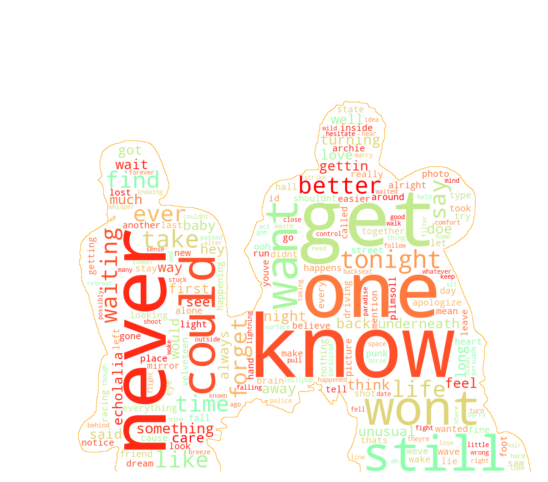

In [8]:
### colormap
# import the desired colormap from matplotlib
cmap = mpl.cm.rainbow(np.linspace(0,1,20)) 
# the darker part of the matrix is selected for readability
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) 

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('alvvays.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(background_color='white',
                      contour_color='orange',
                      mask=cand_mask, 
                      colormap=cmap,
                      contour_width=0.5).generate_from_frequencies(word_tfidf)


#plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()